In [1]:
# Import packages
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set options so that all columns and upto 100 rows are displayed
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', 100) 

## Problem 1. 

### You are provided with data with 10-mins, 60-mins and 1-day resolution (Merge.csv) 

### Please merge them into a pandas Dataframe with 2-hours resolution in between 7:00 – 17:00 only as index. 

### Please take the average of the 10-mins and 60-mins resolution prices during the 2-hours window and forward fill the 1-day resolution prices in the 2-hours window.

In [3]:
# Load data from file
filename="Merge.csv"
df_merge=pd.read_csv(filename , parse_dates=['Datetime'])

In [4]:
df_merge.head()

,Resolution,Datetime,Price
0,10MIN,2021-11-01 07:00:00,70.000
1,10MIN,2021-11-01 07:10:00,NaN
2,10MIN,2021-11-01 07:20:00,71.500
3,10MIN,2021-11-01 07:30:00,71.375
4,10MIN,2021-11-01 07:40:00,NaN


In [5]:
df_merge.tail()

,Resolution,Datetime,Price
1565,D,2021-11-26,88.35
1566,D,2021-11-27,NaN
1567,D,2021-11-28,NaN
1568,D,2021-11-29,94.90
1569,D,2021-11-30,91.70


In [6]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Resolution  1570 non-null   object        
 1   Datetime    1570 non-null   datetime64[ns]
 2   Price       1488 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 36.9+ KB


In [7]:
df_merge["Resolution"].value_counts()

10MIN    1320
1H        220
D          30
Name: Resolution, dtype: int64

In [8]:
df_merge_10MIN=df_merge[df_merge["Resolution"]=='10MIN']
df_merge_10MIN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 0 to 1319
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Resolution  1320 non-null   object        
 1   Datetime    1320 non-null   datetime64[ns]
 2   Price       1248 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 41.2+ KB


In [9]:
df_merge_10MIN.head()

,Resolution,Datetime,Price
0,10MIN,2021-11-01 07:00:00,70.000
1,10MIN,2021-11-01 07:10:00,NaN
2,10MIN,2021-11-01 07:20:00,71.500
3,10MIN,2021-11-01 07:30:00,71.375
4,10MIN,2021-11-01 07:40:00,NaN


In [10]:
df_merge_1H=df_merge[df_merge["Resolution"]=='1H']
df_merge_1H.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 1320 to 1539
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Resolution  220 non-null    object        
 1   Datetime    220 non-null    datetime64[ns]
 2   Price       218 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.9+ KB


In [11]:
df_merge_1H.head()

,Resolution,Datetime,Price
1320,1H,2021-11-01 07:00:00,71.325
1321,1H,2021-11-01 08:00:00,71.200
1322,1H,2021-11-01 09:00:00,71.825
1323,1H,2021-11-01 10:00:00,70.300
1324,1H,2021-11-01 11:00:00,68.850


In [12]:
df_merge_D=df_merge[df_merge["Resolution"]=='D']
df_merge_D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1540 to 1569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Resolution  30 non-null     object        
 1   Datetime    30 non-null     datetime64[ns]
 2   Price       22 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 960.0+ bytes


In [13]:
df_merge_D.head()

,Resolution,Datetime,Price
1540,D,2021-11-01,66.100
1541,D,2021-11-02,70.000
1542,D,2021-11-03,78.375
1543,D,2021-11-04,72.000
1544,D,2021-11-05,72.500


In [14]:
df_merge_D["Datetime"]=df_merge_D["Datetime"].apply(lambda x: pd.Timestamp(x).replace(hour=7))

C:\Users\sandiplaptop3\AppData\Local\Temp\ipykernel_10468\3334174330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_D["Datetime"]=df_merge_D["Datetime"].apply(lambda x: pd.Timestamp(x).replace(hour=7))


In [15]:
df_merge_D.head()

,Resolution,Datetime,Price
1540,D,2021-11-01 07:00:00,66.100
1541,D,2021-11-02 07:00:00,70.000
1542,D,2021-11-03 07:00:00,78.375
1543,D,2021-11-04 07:00:00,72.000
1544,D,2021-11-05 07:00:00,72.500


In [16]:
df_merge_10MIN=df_merge_10MIN.drop(columns=['Resolution'])
df_merge_1H=df_merge_1H.drop(columns=['Resolution'])
df_merge_D=df_merge_D.drop(columns=['Resolution'])

In [17]:
df = pd.merge(df_merge_10MIN, df_merge_1H, on='Datetime', how = 'outer')
df = pd.merge(df, df_merge_D, on='Datetime', how = 'outer')

In [18]:
df.head()

,Datetime,Price_x,Price_y,Price
0,2021-11-01 07:00:00,70.000,71.325,66.1
1,2021-11-01 07:10:00,NaN,NaN,NaN
2,2021-11-01 07:20:00,71.500,NaN,NaN
3,2021-11-01 07:30:00,71.375,NaN,NaN
4,2021-11-01 07:40:00,NaN,NaN,NaN


In [19]:
df.rename(columns={"Price_x": "Price_10MIN", "Price_y": "Price_1H", "Price":"Price_D" }, inplace=True)

In [20]:
df.head(20)

,Datetime,Price_10MIN,Price_1H,Price_D
0,2021-11-01 07:00:00,70.000,71.325,66.1
1,2021-11-01 07:10:00,NaN,NaN,NaN
2,2021-11-01 07:20:00,71.500,NaN,NaN
3,2021-11-01 07:30:00,71.375,NaN,NaN
4,2021-11-01 07:40:00,NaN,NaN,NaN
5,2021-11-01 07:50:00,71.325,NaN,NaN
6,2021-11-01 08:00:00,70.900,71.200,NaN
7,2021-11-01 08:10:00,70.650,NaN,NaN
8,2021-11-01 08:20:00,70.650,NaN,NaN
9,2021-11-01 08:30:00,69.975,NaN,NaN


In [21]:
# Resample the data to 2-hour resolution
df=df.resample('2H', on='Datetime', base=1).mean()

C:\Users\sandiplaptop3\AppData\Local\Temp\ipykernel_10468\2310204171.py:2: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  df=df.resample('2H', on='Datetime', base=1).mean()


In [22]:
df.head(20)

,Price_10MIN,Price_1H,Price_D
Datetime,,,
2021-11-01 07:00:00,70.857500,71.2625,66.1
2021-11-01 09:00:00,71.566667,71.0625,NaN
2021-11-01 11:00:00,68.812500,67.5750,NaN
2021-11-01 13:00:00,63.250000,63.7000,NaN
2021-11-01 15:00:00,65.589583,65.8750,NaN
2021-11-01 17:00:00,NaN,NaN,NaN
2021-11-01 19:00:00,NaN,NaN,NaN
2021-11-01 21:00:00,NaN,NaN,NaN
2021-11-01 23:00:00,NaN,NaN,NaN


In [23]:
# Select only the data between 7:00 and 17:00
df = df.between_time('7:00', '17:00', inclusive='left')

In [24]:
df.head(10)

,Price_10MIN,Price_1H,Price_D
Datetime,,,
2021-11-01 07:00:00,70.857500,71.2625,66.1
2021-11-01 09:00:00,71.566667,71.0625,NaN
2021-11-01 11:00:00,68.812500,67.5750,NaN
2021-11-01 13:00:00,63.250000,63.7000,NaN
2021-11-01 15:00:00,65.589583,65.8750,NaN
2021-11-02 07:00:00,65.678125,66.5750,70.0
2021-11-02 09:00:00,64.956250,65.1875,NaN
2021-11-02 11:00:00,66.729167,67.1000,NaN
2021-11-02 13:00:00,67.395833,66.9125,NaN


### Please take the average of the 10-mins and 60-mins resolution prices during the 2-hours window and forward fill the 1-day resolution prices in the 2-hours window.

In [25]:
df.loc[df['Price_D'].isna(),'Price_D']=(df[df['Price_D'].isna()]['Price_10MIN']+df[df['Price_D'].isna()]['Price_1H'])/2

In [26]:
df.head(10)

,Price_10MIN,Price_1H,Price_D
Datetime,,,
2021-11-01 07:00:00,70.857500,71.2625,66.100000
2021-11-01 09:00:00,71.566667,71.0625,71.314583
2021-11-01 11:00:00,68.812500,67.5750,68.193750
2021-11-01 13:00:00,63.250000,63.7000,63.475000
2021-11-01 15:00:00,65.589583,65.8750,65.732292
2021-11-02 07:00:00,65.678125,66.5750,70.000000
2021-11-02 09:00:00,64.956250,65.1875,65.071875
2021-11-02 11:00:00,66.729167,67.1000,66.914583
2021-11-02 13:00:00,67.395833,66.9125,67.154167


## Problem 2. 

### You are provided with a daily energy consumption data from 2016 to date (Consumption.csv).

### Please create a Pandas DataFrame with to show the consumption of each year. The expected format is to have the year number as column name and mm-dd as index.

### Please also create a seasonal plot showing 5-years (2016-2020) range (shaded) & average (dashed line), and year 2021 (line) & 2022 (line).

### Please comment on your observation on the plot

In [27]:
# Load data from file
# df = pd.read_csv('Consumption.csv', parse_dates=['Date'], dayfirst=True)
# dayfirst does not work as some dates are not right
consumption = pd.read_csv('Consumption.csv')
df=consumption.copy()

In [28]:
df.head()

,Date,Consumption
0,01/01/2016,276.2910
1,02/01/2016,294.6780
2,03/01/2016,306.3096
3,04/01/2016,370.0566
4,05/01/2016,367.3998


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2468 non-null   object 
 1   Consumption  2468 non-null   float64
dtypes: float64(1), object(1)
memory usage: 38.7+ KB


#### Used pd.datetime to catch errors and read dayfirst

In [30]:
df["Date"]=pd.to_datetime(df["Date"],infer_datetime_format=True,  errors='coerce', dayfirst=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2102 non-null   datetime64[ns]
 1   Consumption  2468 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.7 KB


In [32]:
df[df["Date"].isna()]

,Date,Consumption
1461,NaT,344.9952
1462,NaT,380.8296
1463,NaT,356.8698
1464,NaT,348.2028
1465,NaT,357.5502
...,...,...
1822,NaT,320.3550
1823,NaT,363.7872
1824,NaT,365.9094
1825,NaT,362.6694


In [33]:
consumption["Date"][1460:1828]

1460    31/12/2019
1461        202011
1462        202012
1463        202013
1464        202014
           ...    
1823      20201228
1824      20201229
1825      20201230
1826      20201231
1827    01/01/2021
Name: Date, Length: 368, dtype: object

#### Lots of dates are not right and a quick exploration of the data shows that there is data for each day from 1/1/2016 to 3/10/2022 so I just create a column for the dates using this information.

In [34]:
df.head()

,Date,Consumption
0,2016-01-01,276.2910
1,2016-01-02,294.6780
2,2016-01-03,306.3096
3,2016-01-04,370.0566
4,2016-01-05,367.3998


In [35]:
consumption.tail()

,Date,Consumption
2463,29/09/2022,258.0822
2464,30/09/2022,242.5950
2465,01/10/2022,188.0658
2466,02/10/2022,190.6092
2467,03/10/2022,210.3246


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2102 non-null   datetime64[ns]
 1   Consumption  2468 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.7 KB


In [37]:
dates=pd.date_range(start='01/01/2016', end='10/03/2022')

In [38]:
df["Date"]=dates

In [39]:
df.head()

,Date,Consumption
0,2016-01-01,276.2910
1,2016-01-02,294.6780
2,2016-01-03,306.3096
3,2016-01-04,370.0566
4,2016-01-05,367.3998


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2468 non-null   datetime64[ns]
 1   Consumption  2468 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 38.7 KB


In [41]:
df["Date"][1460:1828]

1460   2019-12-31
1461   2020-01-01
1462   2020-01-02
1463   2020-01-03
1464   2020-01-04
          ...    
1823   2020-12-28
1824   2020-12-29
1825   2020-12-30
1826   2020-12-31
1827   2021-01-01
Name: Date, Length: 368, dtype: datetime64[ns]

In [42]:
df1=df.copy() # backup

In [43]:
# df=df1

In [44]:
df = df.set_index('Date')

In [45]:
df.head()

,Consumption
Date,
2016-01-01,276.2910
2016-01-02,294.6780
2016-01-03,306.3096
2016-01-04,370.0566
2016-01-05,367.3998


In [46]:
df2=df.copy()

In [47]:
# df=df2

In [48]:
df['year'] = df.index.year

In [49]:
df.head()

,Consumption,year
Date,,
2016-01-01,276.2910,2016
2016-01-02,294.6780,2016
2016-01-03,306.3096,2016
2016-01-04,370.0566,2016
2016-01-05,367.3998,2016


In [50]:
df["month-day"]=df.index.strftime("%m-%d")

In [51]:
df.head()

,Consumption,year,month-day
Date,,,
2016-01-01,276.2910,2016,01-01
2016-01-02,294.6780,2016,01-02
2016-01-03,306.3096,2016,01-03
2016-01-04,370.0566,2016,01-04
2016-01-05,367.3998,2016,01-05


In [52]:
df=df.pivot(index='month-day',columns='year', values='Consumption')

In [53]:
df.head()

year,2016,2017,2018,2019,2020,2021,2022
month-day,,,,,,,
01-01,276.2910,339.5196,305.9370,313.6320,344.9952,344.0718,246.6612
01-02,294.6780,405.7614,365.8932,391.3758,380.8296,362.9772,263.8980
01-03,306.3096,407.3976,368.2746,424.1646,356.8698,365.1480,316.3698
01-04,370.0566,419.0454,372.1140,404.0766,348.2028,436.0716,348.6078
01-05,367.3998,457.1640,367.8534,364.0140,357.5502,446.6340,360.4338


**Above is a Pandas DataFrame which shows the consumption of each year. The format has the year number as column name and mm-dd as index.**

In [54]:
min_values=df.min(axis=1)
max_values=df.max(axis=1)
mean_values=df.mean(axis=1)

In [55]:
df['min']=min_values
df["max"]= max_values
df["mean"]=mean_values

In [56]:
df.head()

year,2016,2017,2018,2019,2020,2021,2022,min,max,mean
month-day,,,,,,,,,,
01-01,276.2910,339.5196,305.9370,313.6320,344.9952,344.0718,246.6612,246.6612,344.9952,310.158257
01-02,294.6780,405.7614,365.8932,391.3758,380.8296,362.9772,263.8980,263.8980,405.7614,352.201886
01-03,306.3096,407.3976,368.2746,424.1646,356.8698,365.1480,316.3698,306.3096,424.1646,363.504857
01-04,370.0566,419.0454,372.1140,404.0766,348.2028,436.0716,348.6078,348.2028,436.0716,385.453543
01-05,367.3998,457.1640,367.8534,364.0140,357.5502,446.6340,360.4338,357.5502,457.1640,388.721314


In [57]:
df.iloc[:, 5]

month-day
01-01    344.0718
01-02    362.9772
01-03    365.1480
01-04    436.0716
01-05    446.6340
           ...   
12-27    330.2694
12-28    311.3802
12-29    299.7648
12-30    269.2926
12-31    245.5434
Name: 2021, Length: 366, dtype: float64

#### A seasonal plot showing 5-years (2016-2020) range (shaded) & average (dashed line), and year 2021 (line) & 2022 (line).

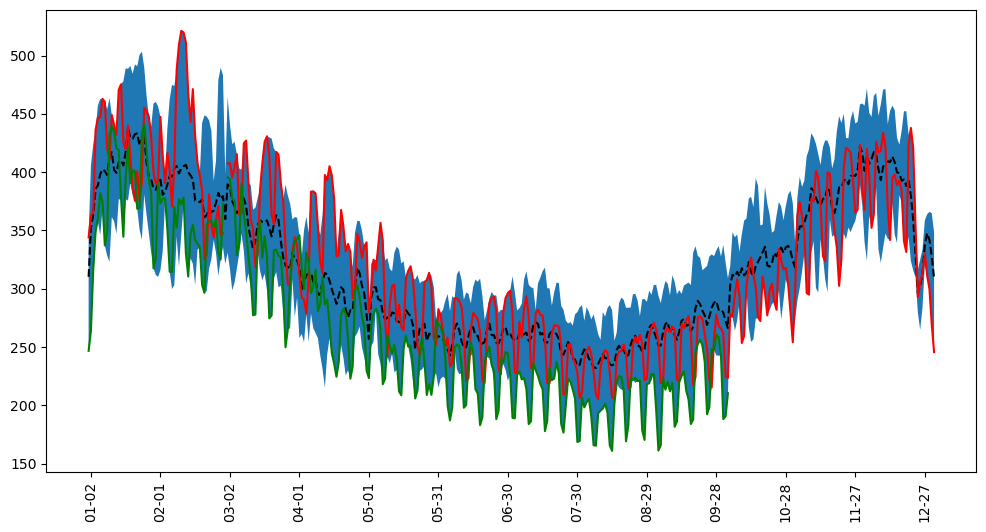

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["mean"],'k', linestyle='dashed')
plt.plot(df.index, df.iloc[:, 5], 'r') # 2021
plt.plot(df.index, df.iloc[:, 6], 'g') # 2022
plt.fill_between(df.index, df["min"], df["max"])
plt.xticks(np.arange(1, 366, 30),  rotation=90)
plt.show()

**Comments on my observation on the plot**

The plot shows the trend of energy cosumption. There is more energy consumption during winter and less during summer. 

Also during the Christmas and New Year's week, the energy consumption is lower even though it is winter and this may be due to closure of work places. 

The high-frequency spikes shows the weekly seasonality although it might be skewed because the same date in different years may not be the same the day of the week. If the year was 364 days with complete number of weeks, it would have been great.

2021: The first part of the year energy prices were low so the comsumption was the highest but later in summer it seems like the increase in price reduced the consumption.

2022: The energy consumption is lowest in this year and this maybe mosstly due to increased energy prices.

## Problem 3. 

A robot moves around a flat surface from position (0,0). It accepts instructions, and moves accordingly. For example:
“BEGIN”
LEFT 3
UP 5
RIGHT 4
DOWN 7
The first word indicates direction and the number shows steps.
The robot will stop moving with instruction “STOP”.
Please write a function, which accepts instructions as a list. When first “STOP” instruction is given, it calculates the distance of Robot from the original position (0,0)

In [59]:
def calculate_distance(instructions):
    x = 0
    y = 0
    for instruction in instructions:
        if instruction == "STOP":
            break
        direction = instruction.split()[0]
        steps = int(instruction.split()[1])
        if direction == "LEFT":
            x -= steps
        elif direction == "RIGHT":
            x += steps
        elif direction == "UP":
            y += steps
        elif direction == "DOWN":
            y -= steps
    return (x**2 + y**2)**0.5

Testing the function.

In [60]:
instructions=['LEFT 3', 'UP 5', 'RIGHT 4', 'DOWN 7']
calculate_distance(instructions)

2.23606797749979

## Problem 4.

You are provided with sample trades data in a data file (trades.csv). It contains a collection of trade data during 5 working days with volume and price. You are asked to process the sample data into a data set for creating the candlestick plots, with open, high, low & close prices (OHLC) and total volume for each product and contract, over a time interval.
You are expected to write a function to create a dataframe contains OHLC and trading volume with (begin, end, product(s), freq) as input. It should be able take freq input, e.g., 15MIN, 1H, 1D.

Expected Result – A python model file detailing process with comments:

Note:

• The product “Emission - Venue A” and “Emission - Venue B” are the same product trading in two different venues, please combine them when queried

• If product list has more than one contract, please generate OHLC and volume data for each contract

• Please limit output within trading hours, i.e., 7:00 – 17:00, except when freq >= 1D

• Please do not use OHLC resampler

In [73]:
# Load data from file
filename="trades.csv"
df=pd.read_csv(filename , parse_dates=['TradeDateTime'])

In [74]:
df.head(50)

,TradeDateTime,Product,Contract,Price,Quantity
0,2022-04-18 00:37:00,Emission - Venue A,DA,20.5000,60
1,2022-04-18 00:42:00,Emission - Venue A,DA,20.6500,30
2,2022-04-18 00:42:00,Emission - Venue A,DA,20.6500,30
3,2022-04-18 00:50:00,Emission - Venue A,DA,20.6500,500
4,2022-04-18 00:54:00,Emission - Venue A,DA,20.6500,100
5,2022-04-18 00:54:00,Emission - Venue A,DA,20.6500,100
6,2022-04-18 01:11:00,Emission - Venue A,DA,20.6500,100
7,2022-04-18 01:15:00,Emission - Venue A,DA,20.7000,40
8,2022-04-18 01:52:00,Emission - Venue A,DA,20.6500,45
9,2022-04-18 07:00:00,Energy,Q01,24.1550,2


In [75]:
df.head()

,TradeDateTime,Product,Contract,Price,Quantity
0,2022-04-18 00:37:00,Emission - Venue A,DA,20.50,60
1,2022-04-18 00:42:00,Emission - Venue A,DA,20.65,30
2,2022-04-18 00:42:00,Emission - Venue A,DA,20.65,30
3,2022-04-18 00:50:00,Emission - Venue A,DA,20.65,500
4,2022-04-18 00:54:00,Emission - Venue A,DA,20.65,100


In [76]:
df.tail(50)

,TradeDateTime,Product,Contract,Price,Quantity
70045,2022-04-21 16:58:00,Energy,Q01,22.77000,1
70046,2022-04-21 16:58:00,Energy,Q01,22.77000,1
70047,2022-04-21 16:58:00,Energy,Q01,22.76750,1
70048,2022-04-21 16:59:00,Energy,Q01,22.76750,1
70049,2022-04-21 16:59:00,Energy,Q01,22.77000,1
70050,2022-04-21 16:59:00,Energy,Q01,22.77500,1
70051,2022-04-21 16:59:00,Energy,Q01,22.77500,4
70052,2022-04-21 16:59:00,Energy,Q01,22.77500,1
70053,2022-04-21 16:59:00,Energy,Q01,22.80000,5
70054,2022-04-21 16:59:00,Energy,Q01,22.80000,1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70095 entries, 0 to 70094
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TradeDateTime  70095 non-null  datetime64[ns]
 1   Product        70095 non-null  object        
 2   Contract       70095 non-null  object        
 3   Price          70095 non-null  float64       
 4   Quantity       70095 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.7+ MB


In [78]:
df.Product.value_counts()

Energy                54552
Emission - Venue A     9792
Emission - Venue B     5751
Name: Product, dtype: int64

Combining "Emission - Venue A" and "Emission - Venue B" into a single product

In [79]:
df.loc[df["Product"] == "Emission - Venue B", "Product"] = "Emission - Venue A"

In [80]:
df.Product.value_counts()

Energy                54552
Emission - Venue A    15543
Name: Product, dtype: int64

In [81]:
df.Contract.value_counts()

Q01    54552
DA      9746
M01     5797
Name: Contract, dtype: int64

In [82]:
df = df.set_index('TradeDateTime')

In [83]:
df.head()

,Product,Contract,Price,Quantity
TradeDateTime,,,,
2022-04-18 00:37:00,Emission - Venue A,DA,20.50,60
2022-04-18 00:42:00,Emission - Venue A,DA,20.65,30
2022-04-18 00:42:00,Emission - Venue A,DA,20.65,30
2022-04-18 00:50:00,Emission - Venue A,DA,20.65,500
2022-04-18 00:54:00,Emission - Venue A,DA,20.65,100


In [115]:
grouped = df.groupby(["Product", "Contract"])

In [116]:
resample_Price = grouped['Price'].resample('15Min').ohlc(_method='ohlc')

In [117]:
resample_Price.head()

open   high    low  close
Product            Contract TradeDateTime                                  
Emission - Venue A DA       2022-04-18 00:30:00  20.50  20.65  20.50  20.65
                            2022-04-18 00:45:00  20.65  20.65  20.65  20.65
                            2022-04-18 01:00:00  20.65  20.65  20.65  20.65
                            2022-04-18 01:15:00  20.70  20.70  20.70  20.70
                            2022-04-18 01:30:00    NaN    NaN    NaN    NaN

In [118]:
resample_Quantity = grouped['Quantity'].resample('15Min').ohlc(_method='ohlc')

In [119]:
resample_Quantity.head()

open   high    low  close
Product            Contract TradeDateTime                                  
Emission - Venue A DA       2022-04-18 00:30:00   60.0   60.0   30.0   30.0
                            2022-04-18 00:45:00  500.0  500.0  100.0  100.0
                            2022-04-18 01:00:00  100.0  100.0  100.0  100.0
                            2022-04-18 01:15:00   40.0   40.0   40.0   40.0
                            2022-04-18 01:30:00    NaN    NaN    NaN    NaN

In [120]:
mapping = {resample_Quantity.columns[0]: 'quantity open', resample_Quantity.columns[1]: 'quantity high',resample_Quantity.columns[2]: 'quantity low',resample_Quantity.columns[3]: 'quantity close'}
resample_Quantity = resample_Quantity.rename(columns=mapping)
resample_Quantity.head()

quantity open  quantity high  \
Product            Contract TradeDateTime                                       
Emission - Venue A DA       2022-04-18 00:30:00           60.0           60.0   
                            2022-04-18 00:45:00          500.0          500.0   
                            2022-04-18 01:00:00          100.0          100.0   
                            2022-04-18 01:15:00           40.0           40.0   
                            2022-04-18 01:30:00            NaN            NaN   

                                                 quantity low  quantity close  
Product            Contract TradeDateTime                                      
Emission - Venue A DA       2022-04-18 00:30:00          30.0            30.0  
                            2022-04-18 00:45:00         100.0           100.0  
                            2022-04-18 01:00:00         100.0           100.0  
                            2022-04-18 01:15:00          40.0            40.0  
                            2022-04-18 01:30:00           NaN             NaN

In [121]:
resample_Quantity.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1031 entries, ('Emission - Venue A', 'DA', Timestamp('2022-04-18 00:30:00')) to ('Energy', 'Q01', Timestamp('2022-04-21 16:45:00'))
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   quantity open   507 non-null    float64
 1   quantity high   507 non-null    float64
 2   quantity low    507 non-null    float64
 3   quantity close  507 non-null    float64
dtypes: float64(4)
memory usage: 47.5+ KB


In [122]:
# pd.concat([resample_Price, resample_Quantity], join='inner')

In [123]:
pd.concat([resample_Price, resample_Quantity], axis=1)

open     high      low  \
Product            Contract TradeDateTime                                    
Emission - Venue A DA       2022-04-18 00:30:00  20.5000  20.6500  20.5000   
                            2022-04-18 00:45:00  20.6500  20.6500  20.6500   
                            2022-04-18 01:00:00  20.6500  20.6500  20.6500   
                            2022-04-18 01:15:00  20.7000  20.7000  20.7000   
                            2022-04-18 01:30:00      NaN      NaN      NaN   
...                                                  ...      ...      ...   
Energy             Q01      2022-04-21 15:45:00  22.5775  22.6075  22.4900   
                            2022-04-21 16:00:00  22.5900  22.7400  22.5625   
                            2022-04-21 16:15:00  22.7125  22.8625  22.6800   
                            2022-04-21 16:30:00  22.8625  22.8625  22.7950   
                            2022-04-21 16:45:00  22.8075  22.8075  22.6875   

                                                   close  quantity open  \
Product            Contract TradeDateTime                                 
Emission - Venue A DA       2022-04-18 00:30:00  20.6500           60.0   
                            2022-04-18 00:45:00  20.6500          500.0   
                            2022-04-18 01:00:00  20.6500          100.0   
                            2022-04-18 01:15:00  20.7000           40.0   
                            2022-04-18 01:30:00      NaN            NaN   
...                                                  ...            ...   
Energy             Q01      2022-04-21 15:45:00  22.6000            1.0   
                            2022-04-21 16:00:00  22.7125            1.0   
                            2022-04-21 16:15:00  22.8600            1.0   
                            2022-04-21 16:30:00  22.8100           12.0   
                            2022-04-21 16:45:00  22.7975            1.0   

                                                 quantity high  quantity low  \
Product            Contract TradeDateTime                                      
Emission - Venue A DA       2022-04-18 00:30:00           60.0          30.0   
                            2022-04-18 00:45:00          500.0         100.0   
                            2022-04-18 01:00:00          100.0         100.0   
                            2022-04-18 01:15:00           40.0          40.0   
                            2022-04-18 01:30:00            NaN           NaN   
...                                                        ...           ...   
Energy             Q01      2022-04-21 15:45:00           40.0           1.0   
                            2022-04-21 16:00:00           21.0           1.0   
                            2022-04-21 16:15:00           19.0           1.0   
                            2022-04-21 16:30:00           33.0           1.0   
                            2022-04-21 16:45:00           10.0           1.0   

                                                 quantity close  
Product            Contract TradeDateTime                        
Emission - Venue A DA       2022-04-18 00:30:00            30.0  
                            2022-04-18 00:45:00           100.0  
                            2022-04-18 01:00:00           100.0  
                            2022-04-18 01:15:00            40.0  
                            2022-04-18 01:30:00             NaN  
...                                                         ...  
Energy             Q01      2022-04-21 15:45:00             1.0  
                            2022-04-21 16:00:00             1.0  
                            2022-04-21 16:15:00             7.0  
                            2022-04-21 16:30:00             1.0  
                            2022-04-21 16:45:00             1.0  

[1031 rows x 8 columns]

In [124]:
df_OHLC=pd.concat([resample_Price, resample_Quantity], axis=1)

In [125]:
df_OHLC.head()

open   high    low  close  \
Product            Contract TradeDateTime                                     
Emission - Venue A DA       2022-04-18 00:30:00  20.50  20.65  20.50  20.65   
                            2022-04-18 00:45:00  20.65  20.65  20.65  20.65   
                            2022-04-18 01:00:00  20.65  20.65  20.65  20.65   
                            2022-04-18 01:15:00  20.70  20.70  20.70  20.70   
                            2022-04-18 01:30:00    NaN    NaN    NaN    NaN   

                                                 quantity open  quantity high  \
Product            Contract TradeDateTime                                       
Emission - Venue A DA       2022-04-18 00:30:00           60.0           60.0   
                            2022-04-18 00:45:00          500.0          500.0   
                            2022-04-18 01:00:00          100.0          100.0   
                            2022-04-18 01:15:00           40.0           40.0   
                            2022-04-18 01:30:00            NaN            NaN   

                                                 quantity low  quantity close  
Product            Contract TradeDateTime                                      
Emission - Venue A DA       2022-04-18 00:30:00          30.0            30.0  
                            2022-04-18 00:45:00         100.0           100.0  
                            2022-04-18 01:00:00         100.0           100.0  
                            2022-04-18 01:15:00          40.0            40.0  
                            2022-04-18 01:30:00           NaN             NaN